In [1]:
!curl https://raw.githubusercontent.com/matplo/alice_papers/master/twiki/alice_papers_table.csv -o alice_abs.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  108k  100  108k    0     0   453k      0 --:--:-- --:--:-- --:--:--  453k


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (10,10)

In [3]:
class ALICEPubPlots(object):
    def __init__(self, cvs_fname, pwg='ALL'):
        self.pwg = pwg
        self.data = pd.read_csv("alice_abs.csv", usecols=['Group', 'DatePublishedArxiv', 'N'])
        self.data['count'] = 1
        if self.pwg != 'ALL':
            self.data = self.data[self.data['Group'].str.contains(self.pwg)]
        self.data['arxiv date'] = pd.to_datetime(self.data['DatePublishedArxiv'], format='%Y-%m-%d')
        self.data['arxiv date idx'] = pd.to_datetime(self.data['DatePublishedArxiv'], format='%Y-%m-%d')
        self.data.set_index(['arxiv date idx'],inplace=True)
        self.data.sort_index(ascending=False, inplace=True)
        self.data['cumul'] = self.data['count'].cumsum()
        self.Npubs = len(self.data['count'])
        self.data['cumulN'] = [self.Npubs+1 - r.cumul for r in self.data.itertuples()]
        self.x = self.data['arxiv date']
        self.y = self.data['cumulN']

    def plot(self, ax=None):
        if ax:
            return self.data.plot(y='cumulN', label=self.pwg)
        else:
            return self.data.plot(y='cumulN', label=self.pwg, ax=ax)            

In [4]:
def plot_groups(groups = 'JE LF CF HF DQ UD GA PP MM ALL'):
    prop_cycle = plt.rcParams['axes.prop_cycle']
    colors = prop_cycle.by_key()['color']
    fig = plt.figure()
    collection = []
    markers = ['o', 's', '<', '>', '^', 'v', 'D', 'x', '.', '+']
    known_groups = ['CF', 'DQ', 'GA', 'HF', 'JE', 'LF', 'PP', 'UD', 'MM', 'ALL']
    for i, name in enumerate(known_groups):
        if name in groups or 'ANY' in groups:
            pwg = ALICEPubPlots("alice_abs.csv", name)
            collection.append(pwg)
            plt.plot(pwg.x, pwg.y, label=name, marker=markers[i], color=colors[i], markersize=8)
    plt.grid(axis='both')
    plt.title("ALICE Collaboration publications")
    plt.xlabel("Date on arXiv")
    plt.ylabel("Number of publications on arXiv")
    plt.legend(title = 'PWGs')
    plt.show()
    return collection, fig

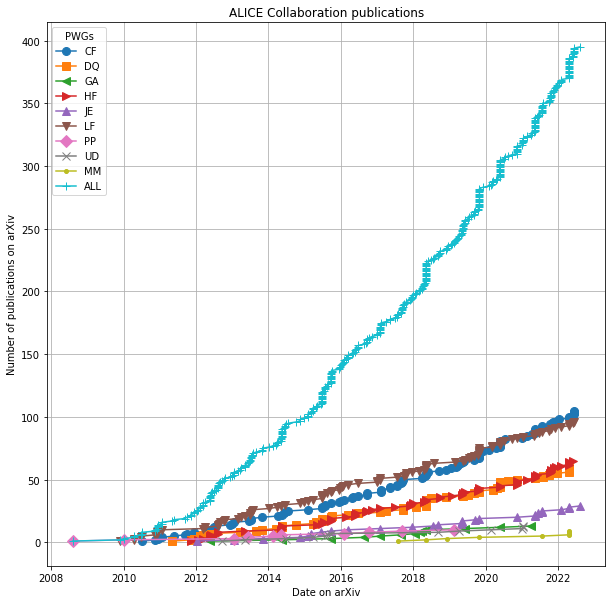

In [5]:
__ = plot_groups('ANY')

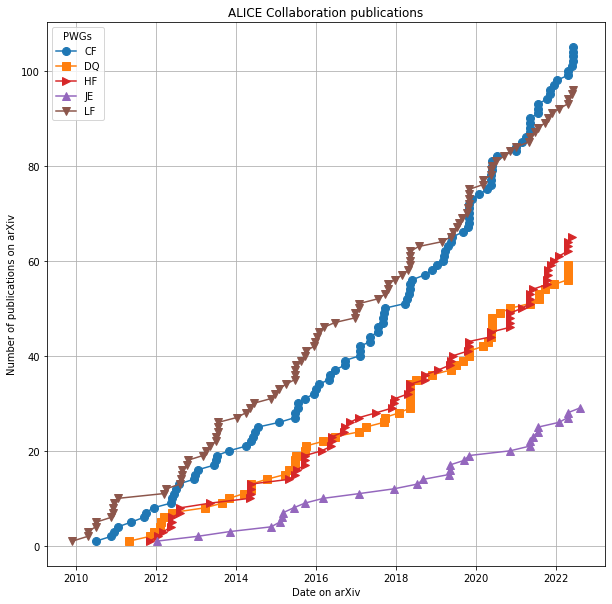

In [6]:
__ = plot_groups('JE LF CF HF DQ')

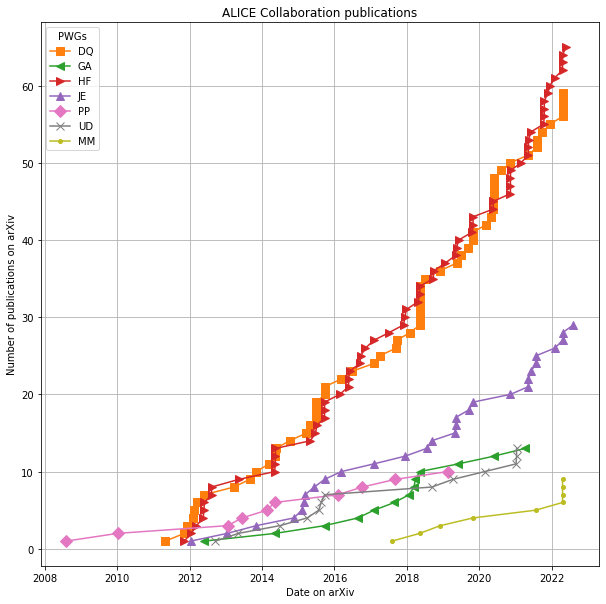

In [7]:
__ = plot_groups('JE GA UD HF DQ PP MM')